In [622]:
#importing necessary libraries
import pandas as pd# fro preparing dataframe
import numpy as np
import matplotlib.pyplot as plt # for visualizing clusters
from matplotlib import style
style.use("ggplot") # choosing the style for visualising clusters
from scipy.cluster.hierarchy import linkage,dendrogram #descriptive analytic 
from sklearn.cluster import KMeans #Descriptive analytic algorithm
from sklearn import preprocessing # for preparing data
from sklearn.preprocessing import Normalizer # For Normalizing data
from numpy import set_printoptions # for limiting number decimals
from sklearn.decomposition import PCA # for reducing attributes


#extracting data
path='C:/datamining/jobhunt.csv'
attributes=['Degree_Award','University','Letter',"Experienced",'Hired']
dataframe=pd.read_csv(path, names=attributes)
print(dataframe)

   Degree_Award University Letter Experienced Hired
0         First        UON   Good         Yes     Y
1         First        UON   Good          No     Y
2        Second        UON   Good          No     Y
3        Second        UON   Good         Yes     Y
4        Second        MOI   Good          No     Y
5        Second         KU   Good          No     Y
6        Second         KU   Good          No     N
7        Second        UON   Good          No     N
8          Pass        MOI    Bad         Yes     N
9          Pass        UON    Bad          No     N
10         Pass         KU   Good          No     N
11         Pass         KU   Good          No     N
12        First       KCAU   Good         Yes     Y
13       Second       KCAU   Good         Yes     Y
14       Second       KCAU    Bad         Yes     Y


In [623]:
#perform data labeling
encoder=preprocessing.LabelEncoder()
encoded_dataframe=dataframe.apply(preprocessing.LabelEncoder().fit_transform)
print("Encoded Data:\n", encoded_dataframe)


Encoded Data:
     Degree_Award  University  Letter  Experienced  Hired
0              0           3       1            1      1
1              0           3       1            0      1
2              2           3       1            0      1
3              2           3       1            1      1
4              2           2       1            0      1
5              2           1       1            0      1
6              2           1       1            0      0
7              2           3       1            0      0
8              1           2       0            1      0
9              1           3       0            0      0
10             1           1       1            0      0
11             1           1       1            0      0
12             0           0       1            1      1
13             2           0       1            1      1
14             2           0       0            1      1


In [624]:
#Data Splitting
# slicing
from numpy import array
#Creating Training and Test Data Samples
#train=data[:split,:]
#test=data[split:,:]

#Step 1: Separate Numeric Data From Attribute Labels
numeric_array=encoded_dataframe.values
print(numeric_array)

[[0 3 1 1 1]
 [0 3 1 0 1]
 [2 3 1 0 1]
 [2 3 1 1 1]
 [2 2 1 0 1]
 [2 1 1 0 1]
 [2 1 1 0 0]
 [2 3 1 0 0]
 [1 2 0 1 0]
 [1 3 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 1 1 1]
 [2 0 1 1 1]
 [2 0 0 1 1]]


In [625]:
#Step 2: Slice the Numeric Data Into Training and Test Samples
split=10
training_sample,test_sample=numeric_array[:split,:],numeric_array[split:,:]
print("Training Sample \n", training_sample)
print("Test Sample \n", test_sample)


Training Sample 
 [[0 3 1 1 1]
 [0 3 1 0 1]
 [2 3 1 0 1]
 [2 3 1 1 1]
 [2 2 1 0 1]
 [2 1 1 0 1]
 [2 1 1 0 0]
 [2 3 1 0 0]
 [1 2 0 1 0]
 [1 3 0 0 0]]
Test Sample 
 [[1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 1 1 1]
 [2 0 1 1 1]
 [2 0 0 1 1]]


In [626]:
#Step 3: Splitting Into Input and Output
X_Attributes_TrainingSample=training_sample[:,0:-1]
Y_Attributes_TrainingSample=training_sample[:,-1]
print("Independent Variables\n",X_Attributes_TrainingSample)
print("Dependent Variables\n",Y_Attributes_TrainingSample)

Independent Variables
 [[0 3 1 1]
 [0 3 1 0]
 [2 3 1 0]
 [2 3 1 1]
 [2 2 1 0]
 [2 1 1 0]
 [2 1 1 0]
 [2 3 1 0]
 [1 2 0 1]
 [1 3 0 0]]
Dependent Variables
 [1 1 1 1 1 1 0 0 0 0]


In [627]:
#Normalization
#Don't normalize if you need to study outliers
#Step 4
normalized_X_attributes=preprocessing.normalize(X_Attributes_TrainingSample)
#normalized_Y_attributes=preprocessing.normalize(Y_Attributes_TrainingSample)
print("Normalized Input Attributes:\n")
set_printoptions(precision=3)
print(normalized_X_attributes)
#print("Normalized Output Attributes:\n",normalized_Y_attributes)


Normalized Input Attributes:

[[0.    0.905 0.302 0.302]
 [0.    0.949 0.316 0.   ]
 [0.535 0.802 0.267 0.   ]
 [0.516 0.775 0.258 0.258]
 [0.667 0.667 0.333 0.   ]
 [0.816 0.408 0.408 0.   ]
 [0.816 0.408 0.408 0.   ]
 [0.535 0.802 0.267 0.   ]
 [0.408 0.816 0.    0.408]
 [0.316 0.949 0.    0.   ]]


In [628]:
#Standardization
#Step 5
standardize_X=preprocessing.scale(X_Attributes_TrainingSample)
print("Standized Attributes:\n",standardize_X)

Standized Attributes:
 [[-1.75   0.75   0.5    1.528]
 [-1.75   0.75   0.5   -0.655]
 [ 0.75   0.75   0.5   -0.655]
 [ 0.75   0.75   0.5    1.528]
 [ 0.75  -0.5    0.5   -0.655]
 [ 0.75  -1.75   0.5   -0.655]
 [ 0.75  -1.75   0.5   -0.655]
 [ 0.75   0.75   0.5   -0.655]
 [-0.5   -0.5   -2.     1.528]
 [-0.5    0.75  -2.    -0.655]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [629]:
# Binarizing
#Step 6
from sklearn.preprocessing import Binarizer
from numpy import set_printoptions
Binarizer=Binarizer(threshold=1.0).fit(X_Attributes_TrainingSample)
Binarized_X=Binarizer.transform(X_Attributes_TrainingSample)
print("n\Binarized Attributes in Training Sample:\n",Binarized_X)

n\Binarized Attributes in Training Sample:
 [[0 1 0 0]
 [0 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


In [630]:
#Decomposing/Compressing/PCA
#Step 7
from sklearn.decomposition import PCA
from numpy import set_printoptions
pca=PCA(n_components=2)
pca.fit(X_Attributes_TrainingSample)
decomposed_X_Attributes= pca.transform(X_Attributes_TrainingSample)
print("\n Decomposed Input Attributes: \n",decomposed_X_Attributes)


 Decomposed Input Attributes: 
 [[ 1.507 -0.52 ]
 [ 1.31  -0.379]
 [-0.094  0.903]
 [ 0.102  0.762]
 [-0.771  0.17 ]
 [-1.448 -0.562]
 [-1.448 -0.562]
 [-0.094  0.903]
 [ 0.227 -0.793]
 [ 0.708  0.079]]


<function matplotlib.pyplot.show(*args, **kw)>

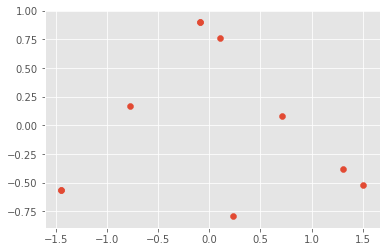

In [631]:
#visualising the array
plt.scatter(decomposed_X_Attributes[:,0],decomposed_X_Attributes[:,1],label='True Position')
plt.show

In [632]:
Single_Linkage_matrix=linkage(decomposed_X_Attributes,'single')
print(Single_Linkage_matrix)

[[ 2.     7.     0.     2.   ]
 [ 5.     6.     0.     2.   ]
 [ 3.    10.     0.242  3.   ]
 [ 0.     1.     0.242  2.   ]
 [ 9.    13.     0.757  3.   ]
 [12.    14.     0.912  6.   ]
 [ 8.    15.     0.997  7.   ]
 [ 4.    16.     0.997  8.   ]
 [11.    17.     0.997 10.   ]]


In [633]:
Complete_Linkage_matrix=linkage(decomposed_X_Attributes,'complete')
print(Complete_Linkage_matrix)

[[ 2.     7.     0.     2.   ]
 [ 5.     6.     0.     2.   ]
 [ 3.    10.     0.242  3.   ]
 [ 0.     1.     0.242  2.   ]
 [ 8.     9.     0.997  2.   ]
 [ 4.    11.     0.997  3.   ]
 [13.    14.     1.308  4.   ]
 [12.    15.     2.039  6.   ]
 [16.    17.     2.955 10.   ]]


In [634]:
Average_Linkage_matrix=linkage(decomposed_X_Attributes,'average')
print(Average_Linkage_matrix)

[[ 2.     7.     0.     2.   ]
 [ 5.     6.     0.     2.   ]
 [ 3.    10.     0.242  3.   ]
 [ 0.     1.     0.242  2.   ]
 [ 9.    13.     0.878  3.   ]
 [ 4.    11.     0.997  3.   ]
 [ 8.    14.     1.155  4.   ]
 [12.    16.     1.656  7.   ]
 [15.    17.     1.992 10.   ]]


In [635]:
Centroid_Linkage_matrix=linkage(decomposed_X_Attributes,'centroid')
print(Centroid_Linkage_matrix)

[[ 2.     7.     0.     2.   ]
 [ 5.     6.     0.     2.   ]
 [ 3.    10.     0.242  3.   ]
 [ 0.     1.     0.242  2.   ]
 [ 9.    13.     0.878  3.   ]
 [ 4.    11.     0.997  3.   ]
 [ 8.    14.     1.081  4.   ]
 [12.    16.     1.587  7.   ]
 [15.    17.     1.804 10.   ]]


In [636]:
Ward_matrix=linkage(decomposed_X_Attributes,'ward')
print(Ward_matrix)

[[ 2.     7.     0.     2.   ]
 [ 5.     6.     0.     2.   ]
 [ 0.     1.     0.242  2.   ]
 [ 3.    10.     0.279  3.   ]
 [ 8.     9.     0.997  2.   ]
 [ 4.    11.     1.152  3.   ]
 [12.    14.     1.337  4.   ]
 [13.    15.     2.9    6.   ]
 [16.    17.     3.729 10.   ]]


<function matplotlib.pyplot.show(*args, **kw)>

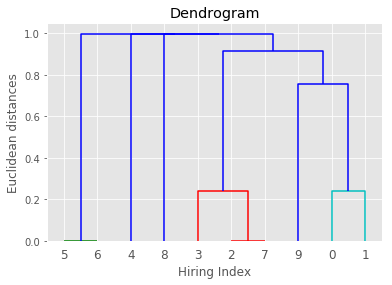

In [637]:
Merged_clusters=dendrogram (Single_Linkage_matrix,truncate_mode="lastp",p=20)
#labeling Dendrogram
plt.title('Dendrogram')
plt.xlabel('Hiring Index')
plt.ylabel('Euclidean distances')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

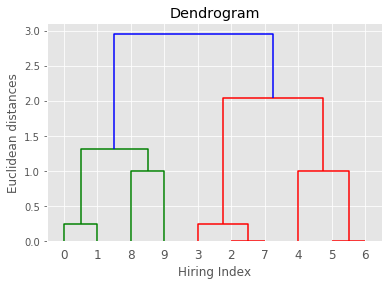

In [638]:
Merged_clusters=dendrogram (Complete_Linkage_matrix,truncate_mode="lastp",p=20)
plt.title('Dendrogram')
plt.xlabel('Hiring Index')
plt.ylabel('Euclidean distances')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

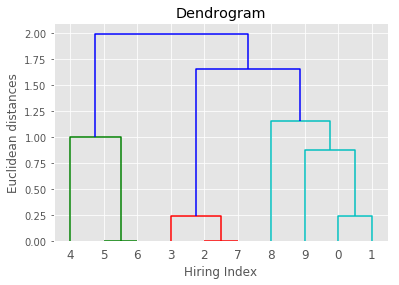

In [639]:
Merged_clusters=dendrogram (Average_Linkage_matrix,truncate_mode="lastp",p=20)
plt.title('Dendrogram')
plt.xlabel('Hiring Index')
plt.ylabel('Euclidean distances')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

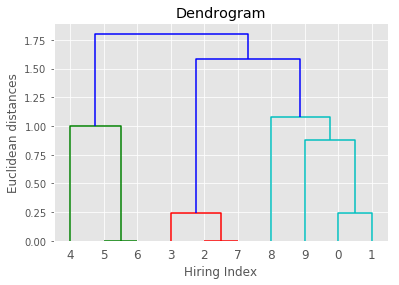

In [640]:
Merged_clusters=dendrogram (Centroid_Linkage_matrix,truncate_mode="lastp",p=20)
plt.title('Dendrogram')
plt.xlabel('Hiring Index')
plt.ylabel('Euclidean distances')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

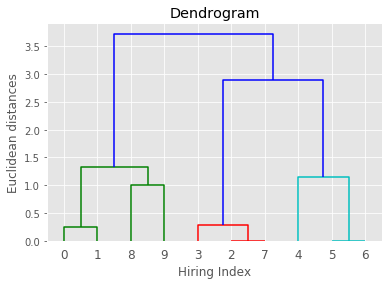

In [641]:
Merged_clusters=dendrogram (Ward_matrix,truncate_mode="lastp",p=20)
plt.title('Dendrogram')
plt.xlabel('Hiring Index')
plt.ylabel('Euclidean distances')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

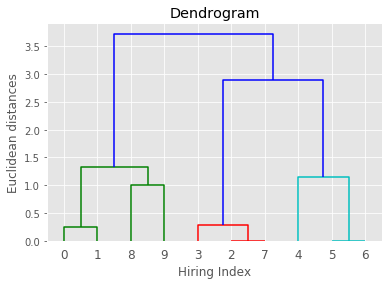

In [642]:
Merged_Clusters= dendrogram(Ward_matrix,truncate_mode="lastp",p=20)

plt.title('Dendrogram')
plt.xlabel('Hiring Index')
plt.ylabel('Euclidean distances')
plt.show


In [643]:
#Predicting Cluster Assignments
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
cluster.fit_predict(Ward_matrix)
print(cluster.labels_)

[0 0 2 0 0 0 1 1 3]


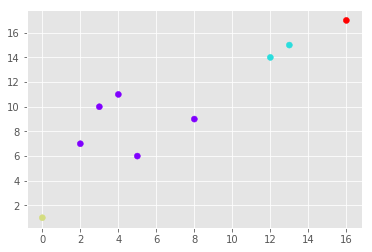

In [644]:
plt.scatter(Ward_matrix[:,0],Ward_matrix[:,1],c=cluster.labels_, cmap='rainbow')